# Lecture 5: Pracitcal approach to using machine learning with Python


## Let's focus on the practical use of machine learning tools with Python (and without)

<b>First, we will try to see how to understand probability with simple calculations</b>

### Probability of event based on the available data

We are given a data, where some numbers were drawn from a basket. These are the following drawing results:

In [1]:
import numpy as np
drawing = np.random.randint(1,10,100)

In [2]:
drawing

array([1, 6, 6, 6, 4, 5, 2, 8, 9, 8, 5, 7, 1, 8, 1, 3, 1, 4, 7, 4, 2, 4,
       9, 9, 7, 5, 8, 8, 2, 8, 1, 3, 7, 8, 9, 8, 8, 3, 4, 4, 6, 8, 8, 3,
       2, 3, 1, 2, 2, 3, 1, 2, 6, 6, 8, 5, 6, 1, 8, 8, 5, 9, 4, 3, 8, 7,
       7, 1, 5, 9, 5, 7, 1, 7, 7, 8, 9, 7, 3, 6, 7, 6, 1, 3, 5, 1, 5, 7,
       9, 5, 2, 7, 2, 1, 5, 7, 7, 5, 9, 3])

In [3]:
len(drawing)

100

In [10]:
counter = 0
for n in drawing:
    if n == 1:
        counter += 1
counter/len(drawing)

0.13

In [17]:
np.unique(drawing, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([13,  9, 10,  7, 12,  9, 15, 16,  9], dtype=int64))

Let's calculate probability of drawing 9:

In [38]:
counter = 0
for n in drawing:
    if n == 9:
        counter += 1

print(counter)

11


In [47]:
len([n for n in drawing if n == 9])/len(drawing)

0.11

In [18]:
def how_many_numbers(list_of_draw,number_to_check):
    counter = len([n for n in list_of_draw if n == number_to_check])
    prob = counter/len(list_of_draw)
    return prob

In [19]:
how_many_numbers(drawing,3)

0.1

In [62]:
from collections import Counter
counter = Counter(drawing)
counter[9]

11

In [63]:
def how_many_numbers(list_of_draw,number_to_check):
    counter = Counter(list_of_draw)
    prob = counter[number_to_check]/len(list_of_draw)
    return prob

In [65]:
how_many_numbers(drawing, 9)

0.11

We can do it simpler with NumPy:

In [72]:
np.array(list(drawing))

array([6, 7, 2, 5, 5, 5, 9, 9, 3, 3, 5, 3, 4, 3, 6, 5, 8, 6, 7, 5, 1, 7,
       9, 8, 4, 3, 6, 8, 6, 7, 9, 8, 4, 6, 4, 7, 7, 6, 9, 2, 2, 8, 6, 8,
       1, 3, 5, 2, 3, 8, 8, 5, 5, 6, 8, 9, 3, 6, 9, 4, 7, 6, 8, 5, 5, 9,
       4, 5, 5, 5, 6, 8, 1, 6, 4, 6, 4, 9, 5, 7, 2, 2, 4, 5, 5, 4, 3, 1,
       6, 9, 9, 3, 3, 2, 5, 3, 8, 3, 5, 2])

In [74]:
import numpy as np

In [79]:
counter = 0
for n in drawing == 9:
    if n:
        counter += 1
print(counter)

11


In [92]:
True == 1

True

In [105]:
np.sum(drawing == 9)/len(drawing)

0.11

Now let's see on a more complex example using pandas.
We have lottery drawings from few weeks:

In [20]:
import pandas as pd
import random

In [22]:
num_drawings = 100
lottery_drawings = []

for _ in range(num_drawings):
    drawing = sorted(random.sample(range(1, 50), 6))  # Draw 6 unique numbers
    lottery_drawings.append(drawing)
    
pd.DataFrame(lottery_drawings)

,0,1,2,3,4,5
0,6,10,16,38,40,47
1,10,12,28,29,41,46
2,7,10,14,29,30,40
3,5,8,15,17,19,21
4,5,9,30,35,43,45
...,...,...,...,...,...,...
95,15,21,24,31,38,49
96,14,17,20,21,26,28
97,11,28,31,39,41,43
98,10,31,34,37,43,48


In [24]:
num_drawings = 100
lottery_drawings = []

for _ in range(num_drawings):
    drawing = sorted(random.sample(range(1, 50), 6))  # Draw 6 unique numbers
    lottery_drawings.append(drawing)
df = pd.DataFrame(lottery_drawings, columns=[f"Number_{i+1}" for i in range(6)])
df

,Number_1,Number_2,Number_3,Number_4,Number_5,Number_6
0,1,18,27,36,38,47
1,2,11,25,41,47,48
2,11,38,40,43,44,47
3,14,16,29,36,44,47
4,10,12,16,21,22,40
...,...,...,...,...,...,...
95,25,32,37,41,42,48
96,4,10,12,18,26,48
97,3,5,20,30,37,49
98,7,12,27,35,45,47


Let's calculate probability of drawing each number and visualize it:

In [34]:
(df == 1).any(axis=1)

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [35]:
mask = (df == 1).any(axis=1)

In [43]:
df.iloc[5:10]

,Number_1,Number_2,Number_3,Number_4,Number_5,Number_6
5,1,6,14,18,26,47
6,12,21,28,38,48,49
7,16,21,23,29,34,45
8,6,12,15,26,30,49
9,14,15,19,31,38,42


In [42]:
df.shape

(100, 6)

In [41]:
(df == 1).sum().sum()/(df.shape[0])

0.08

In [118]:
np.sum(df.values == 9)/(df.shape[0])

0.17

In [46]:
def probs(dframe, number_to_check):
    return np.sum(dframe.values == number_to_check)/(df.shape[0])

In [47]:
{"key":"value"}

{'key': 'value'}

In [48]:
probs_dict = {}
for numbers in range(1,50):
    probs_dict[numbers] = probs(df,numbers)

In [51]:
import matplotlib.pyplot as plt

In [53]:
probs_dict.items()

dict_items([(1, 0.08), (2, 0.09), (3, 0.06), (4, 0.16), (5, 0.12), (6, 0.08), (7, 0.11), (8, 0.1), (9, 0.12), (10, 0.11), (11, 0.1), (12, 0.17), (13, 0.15), (14, 0.11), (15, 0.11), (16, 0.12), (17, 0.13), (18, 0.16), (19, 0.1), (20, 0.17), (21, 0.1), (22, 0.12), (23, 0.1), (24, 0.13), (25, 0.1), (26, 0.12), (27, 0.12), (28, 0.12), (29, 0.12), (30, 0.1), (31, 0.15), (32, 0.14), (33, 0.1), (34, 0.12), (35, 0.14), (36, 0.11), (37, 0.12), (38, 0.08), (39, 0.09), (40, 0.13), (41, 0.15), (42, 0.12), (43, 0.09), (44, 0.14), (45, 0.13), (46, 0.15), (47, 0.28), (48, 0.17), (49, 0.11)])

<BarContainer object of 49 artists>

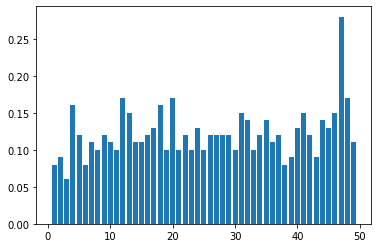

In [54]:
plt.bar(probs_dict.keys(),probs_dict.values())

<BarContainer object of 49 artists>

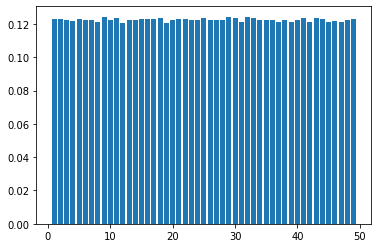

In [55]:
num_drawings = 100_000
lottery_drawings = []

for _ in range(num_drawings):
    drawing = sorted(random.sample(range(1, 50), 6))  # Draw 6 unique numbers
    lottery_drawings.append(drawing)
df = pd.DataFrame(lottery_drawings, columns=[f"Number_{i+1}" for i in range(6)])
probs_dict = {}
for numbers in range(1,50):
    probs_dict[numbers] = probs(df,numbers)
plt.bar(probs_dict.keys(),probs_dict.values())   

### Let's use Python to make a simulation of some event

This way we can simulate even very complex situations with Python and calculate probability of occurences.

Let's start with coin toss:

In [59]:
outcomes = ['H','T']
size = 100
tosses = np.random.choice(outcomes, size = size)
np.sum(tosses == 'H')/size

0.47

In [58]:
np.random.choice([1,2])

2

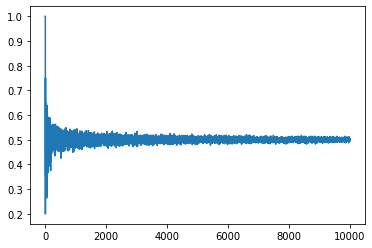

In [61]:
outcomes = ['H','T']
all_probs = []
for n in range(1,10000):
    tosses = np.random.choice(outcomes, size = n)
    probs = np.sum(tosses == 'H')/n
    all_probs.append(probs)
plt.plot(all_probs)

Now, let's calculate probability of winning in roulette while always betting on black.

There are 37 slots, 18 of which are black.

In [216]:
18/37

0.4864864864864865

Let's simulate our winnings over time:

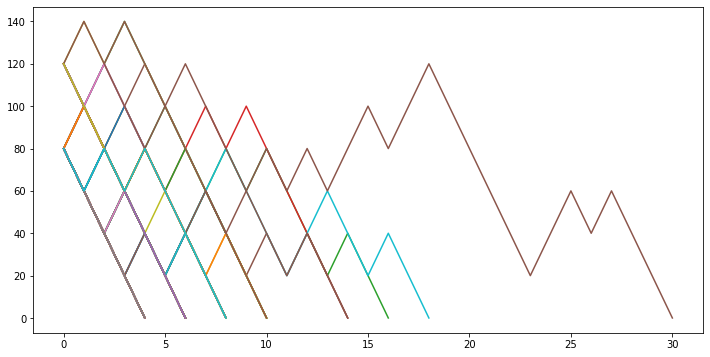

In [78]:
outcomes = ['Black',"Red",'Green']
plt.figure(figsize=(12,6))
probs = [30/37, 6/37, 1/37]
for n in range(100):
    budget = 100
    bet = 20
    winnings = []
    for rounds in range(1000):
        budget -= 20
        outcome = np.random.choice(outcomes,p=probs)
        if outcome == 'Red':
            budget += 20*2
        winnings.append(budget)
        if budget <= 0:
            break
    plt.plot(winnings)

## I hope that using Python to calculate probabilities is clear now. 

### Let's move to how to use Linear Regression and scikit-learn library in Python

First we start with importing the library

In [79]:
import sklearn

Let's define some exemplary data

In [80]:
data = {'X': [1, 2, 3, 4, 5], 'Y': [1.5, 1.7, 3.1, 4.5, 5.2]}
df = pd.DataFrame(data)

In [81]:
df

,X,Y
0,1,1.5
1,2,1.7
2,3,3.1
3,4,4.5
4,5,5.2


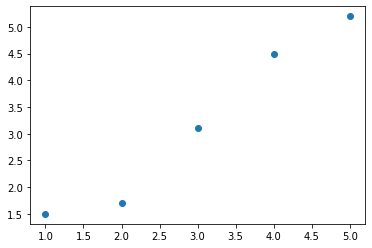

In [83]:
plt.scatter(df['X'],df['Y'])

Now we can fit the model:

In [95]:
df[['X']]

,X
0,1
1,2
2,3
3,4
4,5


In [92]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df[['X']],df[['Y']])

In [97]:
reg.coef_

array([[1.02]])

In [116]:
reg.predict(np.array([1,2,3,4]).reshape(-1,1))

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.16],
       [2.18],
       [3.2 ],
       [4.22]])

Let's plot the model

In [121]:
results = {}
for N in range(1,10):
    prediction = reg.predict([[N]])
    results[N] = prediction[0][0]

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but

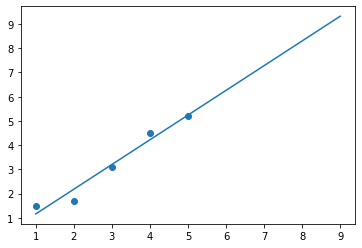

In [122]:
plt.plot(results.keys(),results.values())
plt.scatter(df['X'],df['Y'])

Let's make predictions using the model!

Also, we can asses our model on its performance using one of the metrics:

In [138]:
from sklearn.metrics import r2_score as mse
y_pred = reg.predict(df[['X']]).reshape(1,-1)[0]
y_true = df['Y'].values
mse(y_true,y_pred)

0.9597785977859778

### Now let's do a bit more complex model for multiple linear regression

In [139]:
# Sample dataset
data = {
    'Bedrooms': [2, 3, 3, 4, 5, 3, 4, 4, 5, 2],
    'SquareFootage': [850, 900, 1200, 1500, 2000, 1100, 1600, 1800, 2100, 800],
    'Age': [10, 5, 20, 15, 8, 30, 5, 12, 3, 25],
    'Price': [150000, 200000, 230000, 250000, 300000, 220000, 275000, 280000, 320000, 140000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

In [155]:
df.sort_values("Price")

,Bedrooms,SquareFootage,Age,Price
9,2,800,25,140000
0,2,850,10,150000
1,3,900,5,200000
5,3,1100,30,220000
2,3,1200,20,230000
3,4,1500,15,250000
6,4,1600,5,275000
7,4,1800,12,280000
4,5,2000,8,300000
8,5,2100,3,320000


But actually we should split our data into the <b> training and testing </b> sets.

Why is that?

In [156]:
from sklearn.model_selection import train_test_split
y = df[['Price']]
X = df[['Bedrooms','SquareFootage']]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [157]:
reg = LinearRegression().fit(X_train,y_train)

In [158]:
reg.predict(X_test)

array([[257997.95970416],
       [198826.82989033],
       [203437.89849528]])

In [159]:
y_test

,Price
6,275000
5,220000
2,230000


Using that data we can now evaluate our model better

In [160]:
from sklearn.metrics import r2_score
r2_score(y_test,reg.predict(X_test))

0.15946539239149493

### Let's do even more complex example with a larger dataset of California House Market Prices

In [205]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
# Convert to DataFrame for easier handling
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target  # Target variable (median house value)


Let's explore the dataset first

In [187]:
df = df[['MedInc','HouseAge','AveRooms','MedHouseVal']]

In [206]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


First we have to define what is the target and what are the features

In [207]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Then - split the data

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Then, we can analyse data to try understanding it - and using the statistical measures to describe our data.

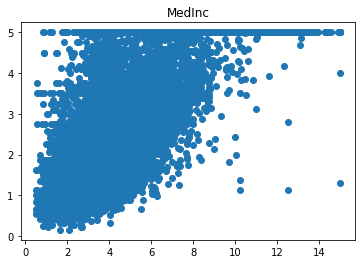

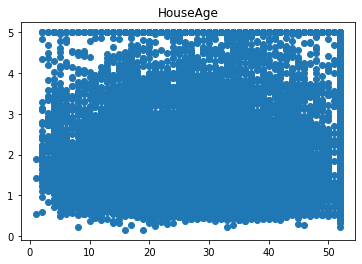

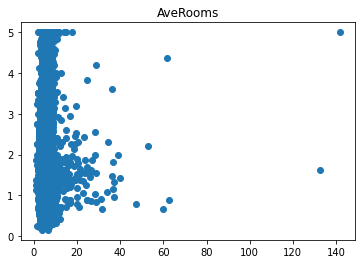

In [190]:
for nam in X_train.columns:
    plt.figure()
    plt.scatter(X_train[nam],y_train)
    plt.title(nam)

In [209]:
df.corr('pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Finally, we develop, train and evaluate our model:

In [211]:
reg = LinearRegression().fit(X_train,y_train)

In [212]:
reg.predict(X_test)

array([6.92249302, 2.1416312 , 1.39770006, ..., 1.19011063, 1.27593135,
       2.06432173])

In [213]:
from sklearn.metrics import mean_squared_error as mse

In [214]:
mse(y_test,reg.predict(X_test))

0.5044117840042076

In tasks like this, we also should try to <b> interpret </b> our results. It is very imporant!

In [215]:
reg.coef_

array([ 4.42966474e-01,  9.11417594e-03, -1.16823370e-01,  6.54944626e-01,
       -4.55827054e-06, -4.10282202e-03, -4.16239490e-01, -4.31018920e-01])

In [216]:
reg.intercept_

-36.677983319051584

## Can I use machine learning without knowing Python?

<b> Yes! </b> Altough less flexible, there ae many *no-code* platform where you can use ML algorithms without the knowledge of any programming language.

These include:

AutoML Platforms

    Google AutoML, DataRobot, and Microsoft Azure ML offer automated machine learning. You simply upload data, choose the task (like prediction or classification), and let the platform handle the complex model-building process.
    
No-Code/Low-Code ML Platforms

    Teachable Machine by Google and Lobe enable users to train image or audio recognition models without writing code. Just upload examples, and the tool manages the rest.
    
ML in Business Intelligence Tools

    Microsoft Power BI and Tableau now integrate ML for tasks like forecasting and anomaly detection. Users can apply ML insights directly to data within the BI platform through intuitive menu options and settings.
    
Graphical ML Software

    Tools like KNIME, RapidMiner, and Orange use drag-and-drop interfaces where each component represents an ML task (data input, model training, etc.). Connect components to design workflows, explore data, and build models visually.
    
    
<b> However, important is to understand how machine learning works - and this course aims at providing you with this knowledge </b> Without this, using no-code platforms is just blind experimentation.